<a href="https://colab.research.google.com/github/Saadman53/Thesis-Human-Activity-Recognition/blob/main/Decision_Level_Fusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')
sensor_preds_path = "drive/My Drive/Dataset/sensor_predictions(optimized).mat"
prewitt_preds_path = "drive/My Drive/Dataset/alexnet_prewitt_predictions(optimized).mat"
sobel_preds_path = "drive/My Drive/Dataset/alexnet_sobel_predictions(optimized).mat"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.functional as F
from torch.utils import data

import torchvision
import torchvision.transforms as transforms



import random
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report


from torch.utils.data import DataLoader, ConcatDataset
# from torchvision import transforms
from sklearn.model_selection  import StratifiedKFold

import torch.optim.lr_scheduler as lr_scheduler
%matplotlib inline

import scipy.io as sio
torch.autograd.set_detect_anomaly(True)


from functools import partial
from typing import Any, Optional

import torch
import torch.nn as nn


In [11]:
y_pred_sens = torch.tensor(sio.loadmat(sensor_preds_path)['preds'])
y_pred_prewitt = torch.tensor(sio.loadmat(prewitt_preds_path)['preds'])
y_pred_sobel = torch.tensor(sio.loadmat(sobel_preds_path)['preds'])
y_test = sio.loadmat(prewitt_preds_path)['y_test']

In [12]:
y_pred_prewitt_sens = y_pred_sens+y_pred_prewitt
y_pred_sobel_sens = y_pred_sens+y_pred_sobel

In [13]:
def cf_matrix(y_pred, test_y):
  y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
  _, y_pred = torch.max(y_pred_softmax, dim = 1)
  y_pred = y_pred.detach().numpy().ravel()
  correct_pred = (y_pred == test_y).astype(np.float)[0]
  acc = correct_pred.sum()*100.0 / y_pred.shape[0]
  cm = confusion_matrix(test_y.ravel(), y_pred)
  recall = np.mean(recall_score(test_y.ravel(), y_pred, average=None))*100.0
  precision = np.mean(precision_score(test_y.ravel(), y_pred, average=None))*100.0
  f,ax=plt.subplots(figsize=(20,10))
  sns.heatmap(cm,annot=True,fmt='.0f', cmap="Blues")
  print(f"Accuracy: {acc:.2f}%")
  print(f"Precision: {precision:.2f}%")
  print(f"Recall: {recall:.2f}%")
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()
  return cm,acc, recall, precision

Accuracy: 97.43%
Precision: 97.59%
Recall: 97.42%


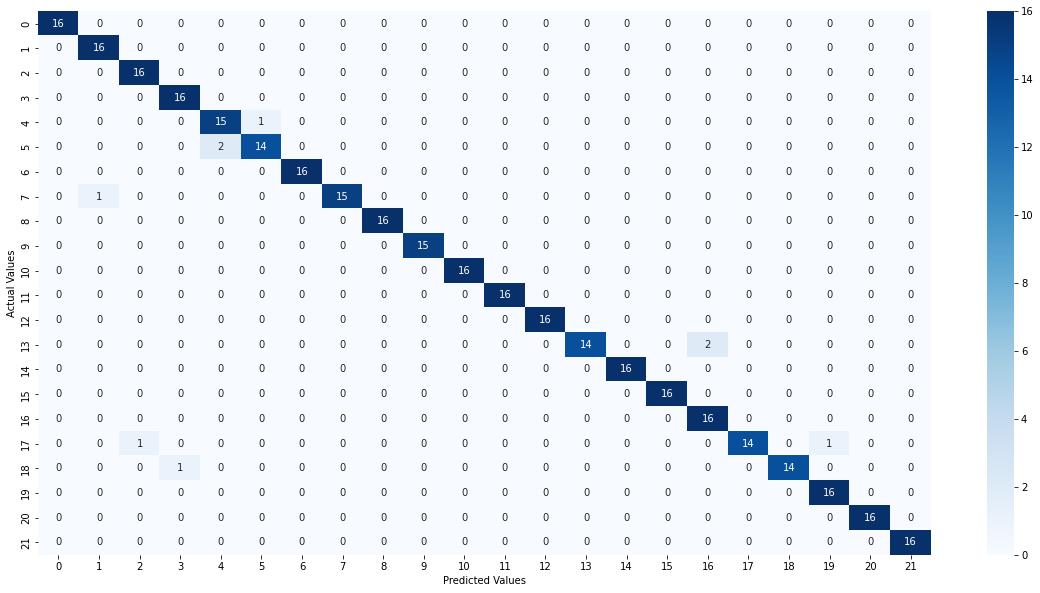

In [14]:
cm,acc, recall, precision = cf_matrix(y_pred_prewitt_sens, y_test)

Accuracy: 99.14%
Precision: 99.20%
Recall: 99.15%


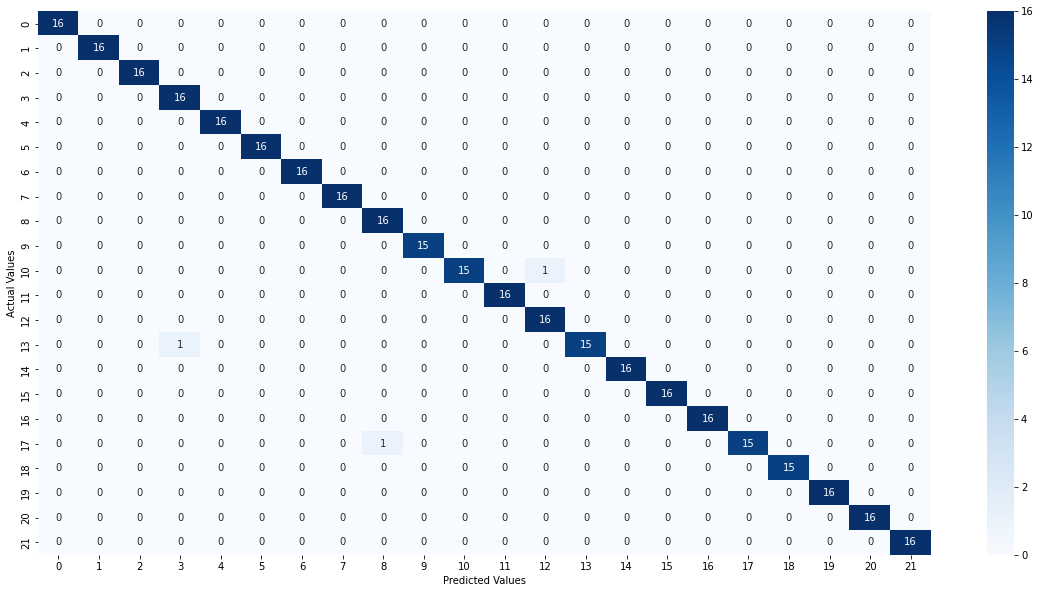

In [15]:
cm,acc, recall, precision = cf_matrix(y_pred_sobel_sens, y_test)

In [ ]:
import seaborn as sns

In [ ]:
_ , y_pred_sens_label = torch.max(torch.log_softmax(y_pred_sens, dim = 1), dim = 1)
_ , y_pred_prewitt_label = torch.max(torch.log_softmax(y_pred_prewitt, dim = 1), dim = 1)
_ , y_pred_sobel_label = torch.max(torch.log_softmax(y_pred_sobel, dim = 1), dim = 1)

In [ ]:
np.corrcoef(y_pred_prewitt_label,y_pred_sens_label)

array([[1.        , 0.96186329],
       [0.96186329, 1.        ]])

In [ ]:
y_pred_sens_label

tensor([10, 10,  8,  8,  5,  2, 21, 20, 12, 21, 21, 16, 10, 14, 20,  7, 20,  1,
        19,  3, 10, 17, 10,  5, 15, 10,  4,  6, 19, 20, 11,  0,  0, 12, 11,  2,
        21,  3,  1, 21,  0, 16,  8, 17, 19, 12, 15,  6, 17,  2, 21,  1,  1,  2,
         4,  3,  5,  1, 17, 18, 13,  1, 16,  1, 14,  8,  3,  3, 15,  1,  9, 15,
        21, 14,  1,  9,  1,  8,  5, 16,  6, 21, 12,  3, 16, 12, 15, 20,  7, 11,
         7, 13, 15, 20, 14, 18, 13, 19,  0, 19,  7, 15, 13, 20, 21, 20,  6,  6,
         6,  6, 11, 16,  6,  8,  2,  8, 16, 12,  9, 16, 18, 11,  1,  6,  4,  7,
         2, 12, 10, 15, 11,  4, 16, 11, 13,  4, 12, 14, 18,  8,  0, 21, 20, 19,
        18, 18, 17, 21, 12,  3,  6, 13, 10,  3, 16, 15,  5, 16,  3,  9,  4, 13,
         7,  7,  0, 14,  0, 19,  8, 14, 11,  9, 19, 19, 15, 14, 13, 10,  7, 10,
        17,  3, 12,  7,  5, 14, 20,  2, 10,  3,  4, 17, 20, 21,  4, 15,  5,  0,
         5, 17, 21, 17, 19, 13,  0,  9,  9, 10,  6,  9, 19,  2,  9, 20,  1,  3,
        20, 12,  7,  4,  2, 17, 13,  8, 

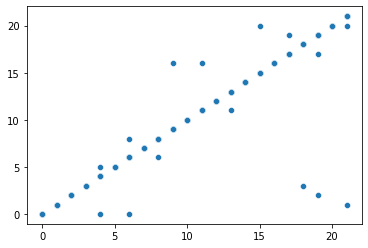

In [ ]:
sns.scatterplot(y_pred_sens_label,y_pred_prewitt_label)

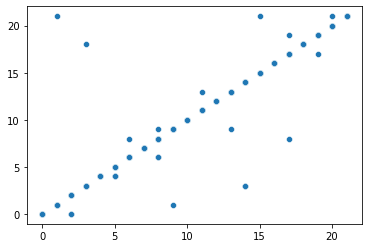

In [ ]:
sns.scatterplot(y_pred_sobel_label,y_pred_sens_label)

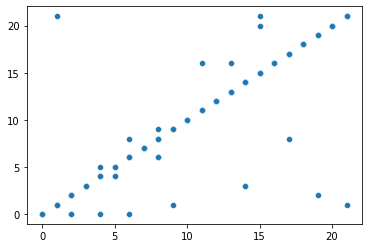

In [ ]:
sns.scatterplot(y_pred_sobel_label,y_pred_prewitt_label)